# Team Assignment 2 - Data Storage and Access

Submitted for Team Trackstars. 

## Notebook Dependencies

In [2]:
import sqlite3 as sql
import pandas as pd
import math

## Helper Functions

In [3]:
def execute(query, params=[]): 
    """
    Utility function to ensure proper handling of DB connection, encourage
    parameterization of queries and provide error handling for common exceptions. 
    Returns the list of rows (tuples) the query produces. 
    """
    rows = []
    try: 
        with sql.connect(db_file) as connection: 
            cursor = connection.execute(query, params) 
            rows = cursor.fetchall()
    except sql.OperationalError as oe: 
        print("Error: ", oe)
    
    return rows

In [4]:
def get_table_info(): 
    """
    Return the metadata associated with the table
    """
    return execute("PRAGMA table_info(tips)")

# CREATE

*You have been provided with a sample .csv file. Create a SQLite database in Python using the data in this sample .csv file.*

In [5]:
csv_file = 'data/tips.csv' 
db_file = 'data/tips.db' 

**Create DB from CSV...**

In [6]:
df = pd.read_csv(csv_file)

with sql.connect(db_file) as connection:
    df.to_sql('tips', connection, if_exists='replace', index = False)
    connection.commit()
    print(df.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


**Validate DB creation, content...** 

In [7]:
with sql.connect(db_file) as connection: 
    cursor = connection.execute("SELECT * FROM tips") 
    rows = cursor.fetchall()
    for row in rows[0:5]: 
        print(row)

(16.99, 1.01, 'Female', 'No', 'Sun', 'Dinner', 2)
(10.34, 1.66, 'Male', 'No', 'Sun', 'Dinner', 3)
(21.01, 3.5, 'Male', 'No', 'Sun', 'Dinner', 3)
(23.68, 3.31, 'Male', 'No', 'Sun', 'Dinner', 2)
(24.59, 3.61, 'Female', 'No', 'Sun', 'Dinner', 4)


## READ
*Answer the following questions (must show your work via SQL queries):*

**1. Retrieve the average tip percentage for each day of the week**

In [8]:
rows = execute("SELECT AVG(tip),day FROM tips GROUP BY day") 
for row in rows: 
    print(row)

(2.734736842105263, 'Fri')
(2.993103448275862, 'Sat')
(3.2551315789473683, 'Sun')
(2.771451612903226, 'Thur')


**2. Find the maximum and minimum total bill amounts**

In [9]:
rows = execute("SELECT MIN(total_bill), MAX(total_bill) FROM tips")
for row in rows:
    print(row)

(3.07, 50.81)


**3. Count the number of parties for each size**

**4. Retrieve the total bill and tip for parties of size 4 or more, where the tip percentage is greater than 15%**

**5. Retrieve the total bill, tip amount, and tip percentage for each combination of day and time, sorted by tip percentage in descending order**

**6. Find the average tip percentage for each combination of day, time, and smoker status**

**7. Retrieve the total bill, tip amount, and tip percentage for each sex, sorted by total bill in descending order, and limit the results to the top 5 records**

**8. Find the maximum and minimum tip percentage for each day and time combination, along with the corresponding total bill and tip amount**

**9. Retrieve the total bill, tip amount, and tip percentage for parties of size 4 or more, where the tip percentage is greater than 15%, and the total bill is between $50 and $100**

**10. Find the average tip percentage for each combination of day, time, and smoker status, but only include combinations with more than 5 records**

**11. Get the unique days reported**

In [10]:
rows = execute("SELECT DISTINCT day FROM tips")
for row in rows: 
    print(row[0]) 

Sun
Sat
Thur
Fri


**12. Group and count the party sizes**

In [11]:
rows = execute("SELECT size, count(*) FROM tips GROUP BY day")
for row in rows: 
    print(row)

(2, 19)
(3, 87)
(2, 76)
(4, 62)


**13. Comparing average tips from smokers and non-smokers**

In [12]:
rows = execute(
"SELECT AVG(tip) FROM tips WHERE smoker=?\
UNION ALL \
SELECT AVG(tip) FROM tips WHERE smoker=?", ['Yes','No']) 
for row in rows: 
    print(row)

(3.008709677419355,)
(2.9918543046357615,)


**14. Basic query with column renaming and ordering**

In [13]:
rows = execute(
"SELECT total_bill AS bill, tip AS gratuity FROM tips WHERE sex=? ORDER BY tip",
['Female'])
for row in rows[0:10]: 
    print(row)

(3.07, 1.0)
(5.75, 1.0)
(7.25, 1.0)
(16.99, 1.01)
(12.9, 1.1)
(8.51, 1.25)
(18.64, 1.36)
(26.41, 1.5)
(10.65, 1.5)
(11.17, 1.5)


**15. Select with criteria and emit rowid alongside limited rowset count**

In [14]:
rows = execute("SELECT rowid AS id, tip, smoker FROM tips WHERE size>? LIMIT ?", [2,4])
for row in rows: 
    print(row)

(2, 1.66, 'No')
(3, 3.5, 'No')
(5, 3.61, 'No')
(6, 4.71, 'No')


## UPDATE

*It was determined that there was an error in the database. Please update the record that corresponds to id=10 and set smoker to Yes.*

In [15]:
rows = execute("select rowid, * from tips WHERE rowid=?", [10]) 
if rows: print(rows[0])

(10, 14.78, 3.23, 'Male', 'No', 'Sun', 'Dinner', 2)


In [16]:
execute("UPDATE tips SET smoker='Yes' WHERE rowid=?", [10]) 

[]

In [17]:
rows = execute("select rowid, * from tips WHERE rowid=?", [10]) 
if rows: print(rows[0])

(10, 14.78, 3.23, 'Male', 'Yes', 'Sun', 'Dinner', 2)


## DELETE
*Delete records from the database that have a total bill that is less than $10.*

In [18]:
rows = execute("select total_bill from tips WHERE total_bill<?", [10]) 
for row in rows: 
    print(row)

(8.77,)
(9.55,)
(9.68,)
(9.94,)
(3.07,)
(5.75,)
(7.25,)
(8.52,)
(8.51,)
(8.35,)
(9.78,)
(7.51,)
(7.25,)
(9.6,)
(7.56,)
(7.74,)
(8.58,)


In [19]:
execute("DELETE FROM tips WHERE total_bill<?", [10]) 

[]

In [20]:
rows = execute("select total_bill from tips WHERE total_bill<?", [11]) 
for row in rows: 
    print(row)

(10.34,)
(10.27,)
(10.33,)
(10.29,)
(10.51,)
(10.07,)
(10.65,)
(10.33,)
(10.59,)
(10.63,)
(10.34,)
(10.09,)
(10.77,)
(10.07,)


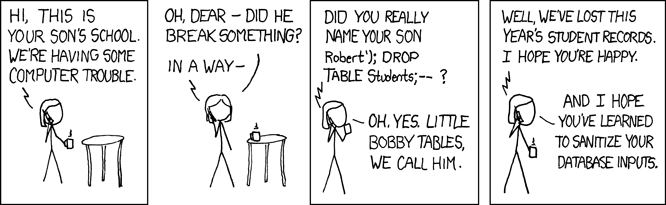

[*Source*](https://xkcd.com/327/)